In [1]:
import numpy as np
import random
import csv

def skeleton(age):
    start_dur = 60
    dur_per_age = 0.4
    cur_dur = start_dur - (age * dur_per_age)
    random_factor = (random.randint(75, 125) / 100)
    result = round(cur_dur * random_factor,2)
    if(result > 100):
        return 100
    return result

def zombie(age):
    start_dur = 120
    dur_per_age = 1.0
    cur_dur = start_dur - (age * dur_per_age)
    random_factor = (random.randint(75, 125) / 100)
    result = round(cur_dur * random_factor,2)
    if(result > 100):
        return 100
    return result
    
dataset = []

undead_type_shift = random.randint(72, 88)

for count in range(0, 160):
    age = random.randint(40,60)
    age += random.randint(-10,10)
    undead = [age]
    if(count >= undead_type_shift):
        undead.append(skeleton(age))
        undead.append('Skeleton')
    else:
        undead.append(zombie(age))
        undead.append('Zombie')
    dataset.append(undead)
        
#display(dataset)

random.shuffle(dataset)

with open('undeads.csv', 'w', newline='') as csvfile:
    c_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    c_writer.writerow(['Age', 'Durability', 'Type'])
    for undead in dataset:
        c_writer.writerow([undead[0], undead[1], undead[2]])

In [2]:
data = np.array(dataset)
display(data)

array([['47', '60.59', 'Zombie'],
       ['47', '47.79', 'Skeleton'],
       ['37', '68.06', 'Zombie'],
       ['53', '50.25', 'Zombie'],
       ['38', '68.88', 'Zombie'],
       ['43', '57.75', 'Zombie'],
       ['58', '31.65', 'Skeleton'],
       ['70', '36.16', 'Skeleton'],
       ['61', '43.08', 'Skeleton'],
       ['59', '72.59', 'Zombie'],
       ['62', '32.38', 'Skeleton'],
       ['42', '41.04', 'Skeleton'],
       ['50', '44.8', 'Skeleton'],
       ['41', '70.31', 'Zombie'],
       ['39', '69.66', 'Zombie'],
       ['56', '42.49', 'Skeleton'],
       ['53', '81.07', 'Zombie'],
       ['38', '37.18', 'Skeleton'],
       ['51', '51.75', 'Zombie'],
       ['51', '34.85', 'Skeleton'],
       ['38', '77.9', 'Zombie'],
       ['52', '35.67', 'Skeleton'],
       ['49', '31.92', 'Skeleton'],
       ['63', '33.06', 'Skeleton'],
       ['60', '36.72', 'Skeleton'],
       ['37', '53.79', 'Skeleton'],
       ['47', '55.48', 'Zombie'],
       ['42', '70.98', 'Zombie'],
       ['38', '51.07

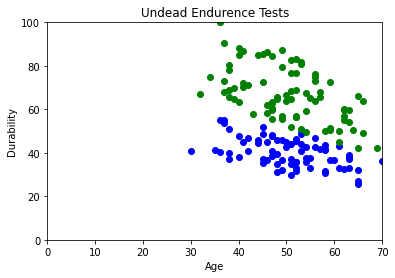

In [3]:
import matplotlib.pyplot as plt

for idx in range(0,len(dataset)):
    
    undead = dataset[idx]

    age = undead[0]
    durability = undead[1]
    color = 'g'
    if undead[2] == 'Skeleton':
        color = 'b'

    plt.scatter(age, durability, c=color, label=undead[2])

plt.axis([0, 70, 0, 100])
plt.title('Undead Endurence Tests')
plt.xlabel('Age')
plt.ylabel('Durability')
plt.show()

In [4]:
import pandas as pd

data = pd.read_csv('undeads.csv')

display(data)

,Age,Durability,Type
0,47,60.59,Zombie
1,47,47.79,Skeleton
2,37,68.06,Zombie
3,53,50.25,Zombie
4,38,68.88,Zombie
...,...,...,...
155,49,56.80,Zombie
156,56,72.96,Zombie
157,48,65.52,Zombie
158,36,55.18,Skeleton


In [5]:
def skeleton(age):
    start_dur = 60
    dur_per_age = 0.4
    cur_dur = start_dur - (age * dur_per_age)
    result = round(cur_dur,2)
    if(result > 100):
        return 100
    return result

def zombie(age):
    start_dur = 120
    dur_per_age = 1.0
    cur_dur = start_dur - (age * dur_per_age)
    result = round(cur_dur,2)
    if(result > 100):
        return 100
    return result

zombies = [[44, zombie(44)], [52, zombie(52)]]
skeletons = [[47, skeleton(47)], [59, skeleton(59)], [51, skeleton(51)]]

print('Zombies:', zombies)
print('Skeletons:', skeletons)

Zombies: [[44, 76.0], [52, 68.0]]
Skeletons: [[47, 41.2], [59, 36.4], [51, 39.6]]


[[44, 76.0], [52, 68.0], [47, 41.2], [59, 36.4], [51, 39.6]]


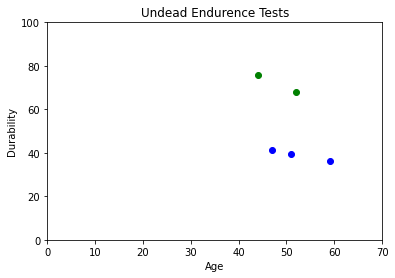

Good Weight Amounts: 18
Middle of good weights: [-7, 7]

Bad Zombie Weight Amounts: 10
Middle of bad zombie weights: [-7, 5]

Bad Skeleton Weight Amounts: 5
Middle of bad skeleton weights: [-6, 7]

True


In [21]:
import matplotlib.pyplot as plt

def activation_function(x):
    if x < 0:
        return 0
    else:
        return 1
    
def perceptron(inp, weights):
    # This is the same as the dot product np.dot(i, w)
    dot_product = sum([i * w for i, w in zip(inp, weights)])
    output = activation_function(dot_product)
    return output

zombies = [[44, zombie(44)], [52, zombie(52)]]
skeletons = [[47, skeleton(47)], [59, skeleton(59)], [51, skeleton(51)]]
undeads = zombies + skeletons

print(undeads)

for idx in range(0,len(undeads)):
    color = 'g'
    if(idx >= 2):
        color = 'b'
    plt.scatter(undeads[idx][0], undeads[idx][1], c=color)
    
plt.axis([0, 70, 0, 100])
plt.title('Undead Endurence Tests')
plt.xlabel('Age')
plt.ylabel('Durability')
plt.show()

found_weights = []
one_zombie_wrong = []
one_skeleton_wrong = []

for w1 in range(-10,10):
    for w2 in range(-10,10):
        good_weights = True
        wrong_skel_count = 0
        wrong_zomb_count = 0
        for skel in skeletons:
            if(perceptron(skel, [w1,w2]) != 0):
                good_weights = False
                wrong_skel_count += 1
        for zomb in zombies:
            if(perceptron(zomb, [w1,w2]) != 1):
                good_weights = False
                wrong_zomb_count += 1
        if good_weights == True:
            found_weights.append([w1,w2])
        if wrong_skel_count == 0 and wrong_zomb_count == 1:
            one_zombie_wrong.append([w1,w2])
        if wrong_skel_count == 1 and wrong_zomb_count == 0:
            one_skeleton_wrong.append([w1,w2])
            
print('Good Weight Amounts:', len(found_weights))
print('Middle of good weights:', (found_weights[int(round(len(found_weights)/2,0))]))
print()
print('Bad Zombie Weight Amounts:', len(one_zombie_wrong))
print('Middle of bad zombie weights:', (one_zombie_wrong[int(round(len(one_zombie_wrong)/2,0))]))
print()
print('Bad Skeleton Weight Amounts:', len(one_skeleton_wrong))
print('Middle of bad skeleton weights:', (one_skeleton_wrong[int(round(len(one_skeleton_wrong)/2,0))]))
print()

print([-8, 7] in found_weights)